In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define the cubic polynomial function
def cubic_function(x):
    return x**3 - 3*x**2 + 2*x + 1

# Generate training data
x_train = np.linspace(-2, 3, 100)  # 100 points between -2 and 3
y_train = cubic_function(x_train)

# Convert the training data to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).view(-1, 1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

In [4]:
class ANNModel(nn.Module):
    def __init__(self):
        super(ANNModel, self).__init__()
        self.hidden1 = nn.Linear(1, 64)  # First hidden layer with 64 neurons
        self.hidden2 = nn.Linear(64, 32)  # Second hidden layer with 32 neurons
        self.output = nn.Linear(32, 1)  # Output layer

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = self.output(x)
        return x

# Instantiate the model
model = ANNModel()

In [5]:
# Define loss function (Mean Squared Error) and optimizer (Adam)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [6]:
# Number of epochs for training
epochs = 1000

# Training loop
for epoch in range(epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_train_tensor)

    # Compute and print loss
    loss = criterion(y_pred, y_train_tensor)

    # Zero gradients, perform a backward pass, and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 0.2003
Epoch [200/1000], Loss: 0.0144
Epoch [300/1000], Loss: 0.0038
Epoch [400/1000], Loss: 0.0017
Epoch [500/1000], Loss: 0.0009
Epoch [600/1000], Loss: 0.0006
Epoch [700/1000], Loss: 0.0004
Epoch [800/1000], Loss: 0.0003
Epoch [900/1000], Loss: 0.0003
Epoch [1000/1000], Loss: 0.0004


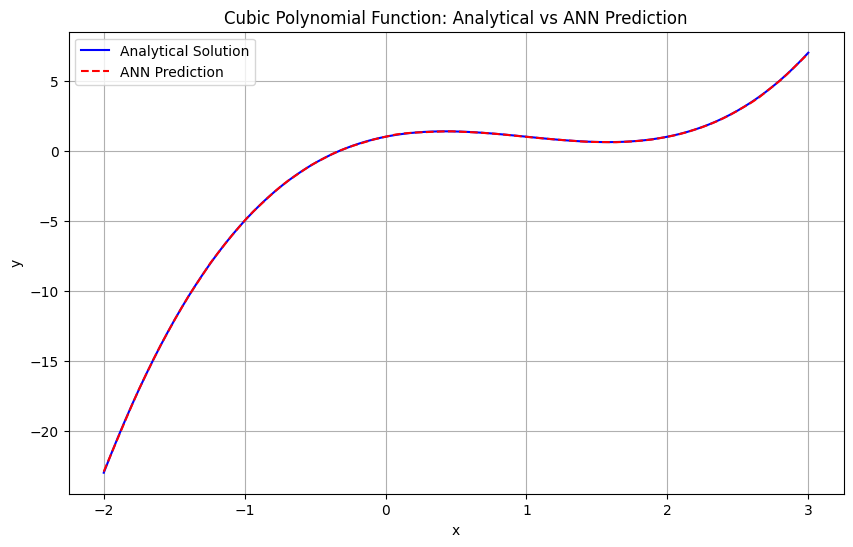

In [7]:
# Generate predictions using the trained model
y_pred_tensor = model(x_train_tensor).detach().numpy()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, label='Analytical Solution', color='blue')
plt.plot(x_train, y_pred_tensor, label='ANN Prediction', color='red', linestyle='--')
plt.title('Cubic Polynomial Function: Analytical vs ANN Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
